In [1]:
import pandas as pd
import numpy as np


In [12]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly, units, Daily, Stations
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser
api_key = "862c1bd096866959e45958e7e32785e0"
lat = 21.8853
lon = -102.2916
start_w = 15629000
end_w = 1638246029
url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_w}&end={end_w}&appid={api_key}"
response = requests.get(url).json()
time.sleep(60)
response.keys()
co_df = pd.DataFrame(response["list"])
co_df

KeyboardInterrupt: 

In [2]:
df = pd.read_csv('number-of-natural-disaster-events.csv')

In [6]:
df = df.pivot_table(columns='Entity',index='Year')

In [19]:
df.columns.get_level_values(1)

Index(['All natural disasters', 'Drought', 'Earthquake', 'Extreme temperature',
       'Extreme weather', 'Flood', 'Impact', 'Landslide',
       'Mass movement (dry)', 'Volcanic activity', 'Wildfire'],
      dtype='object', name='Entity')

In [77]:
df

Number of reported natural disasters (reported disasters)          \
Entity                                     All natural disasters Drought   
Year                                                                       
1900                                                  5.0            2.0   
1901                                                  2.0            NaN   
1902                                                  9.0            NaN   
1903                                                  8.0            1.0   
1904                                                  2.0            NaN   
...                                                   ...            ...   
2014                                                320.0           18.0   
2015                                                380.0           28.0   
2016                                                325.0           15.0   
2017                                                276.0            7.0   
2018                                                282.0           13.0   

                                                                               \
Entity Earthquake Extreme temperature Extreme weather  Flood Impact Landslide   
Year                                                                            
1900          NaN                 NaN             1.0    1.0    NaN       NaN   
1901          2.0                 NaN             NaN    NaN    NaN       NaN   
1902          3.0                 NaN             1.0    NaN    NaN       NaN   
1903          1.0                 NaN             2.0    2.0    NaN       NaN   
1904          1.0                 NaN             1.0    NaN    NaN       NaN   
...           ...                 ...             ...    ...    ...       ...   
2014         26.0                17.0            99.0  135.0    NaN      15.0   
2015         23.0                12.0           118.0  160.0    NaN      20.0   
2016         30.0                12.0            84.0  161.0    NaN      13.0   
2017         19.0                11.0            85.0  114.0    NaN      25.0   
2018         20.0                25.0            84.0  109.0    NaN      13.0   

                                                       
Entity Mass movement (dry) Volcanic activity Wildfire  
Year                                                   
1900                   NaN               1.0      NaN  
1901                   NaN               NaN      NaN  
1902                   NaN               5.0      NaN  
1903                   1.0               1.0      NaN  
1904                   NaN               NaN      NaN  
...                    ...               ...      ...  
2014                   NaN               6.0      4.0  
2015                   1.0               6.0     12.0  
2016                   NaN               NaN     10.0  
2017                   NaN               2.0     13.0  
2018                   1.0               7.0     10.0  

[119 rows x 11 columns]

In [79]:
# df.drop(['Impact'], axis = 1, inplace = True)

# Handle missing values and rename columns
df.fillna(value = 0, inplace = True)
df = df.add_suffix(' (Occurrence)')


In [84]:
df.columns = df.columns.get_level_values(1)

In [90]:
df.to_csv('disasters.csv')

In [88]:
df = df.merge(annual_avg_temps,left_index=True, right_index=True)

In [91]:
df.to_csv('combined_disasters_temps.csv')

In [9]:
diffs = df.diff()

In [11]:
diffs.corr()

Number of reported natural disasters (reported disasters)  \
Entity                                                                                                       All natural disasters   
                                                   Entity                                                                            
Number of reported natural disasters (reported ... All natural disasters                                           1.000000          
                                                   Drought                                                         0.553096          
                                                   Earthquake                                                      0.297483          
                                                   Extreme temperature                                             0.341658          
                                                   Extreme weather                                                 0.550795          
                                                   Flood                                                           0.645183          
                                                   Impact                                                               NaN          
                                                   Landslide                                                       0.083259          
                                                   Mass movement (dry)                                             0.108735          
                                                   Volcanic activity                                               0.115656          
                                                   Wildfire                                                        0.464260          

                                                                                    \
Entity                                                                     Drought   
                                                   Entity                            
Number of reported natural disasters (reported ... All natural disasters  0.553096   
                                                   Drought                1.000000   
                                                   Earthquake             0.141004   
                                                   Extreme temperature    0.262502   
                                                   Extreme weather        0.152160   
                                                   Flood                  0.179009   
                                                   Impact                      NaN   
                                                   Landslide              0.016287   
                                                   Mass movement (dry)    0.228639   
                                                   Volcanic activity      0.259641   
                                                   Wildfire               0.385327   

                                                                                     \
Entity                                                                   Earthquake   
                                                   Entity                             
Number of reported natural disasters (reported ... All natural disasters   0.297483   
                                                   Drought                 0.141004   
                                                   Earthquake              1.000000   
                                                   Extreme temperature    -0.004842   
                                                   Extreme weather         0.241378   
                                                   Flood                  -0.088800   
                                                   Impact                       NaN   
                                                   Landslide              -0.245373   
                                  

In [72]:
co_df.loc[:,:'nh3'].to_csv('co_df.csv')

In [52]:
import time
 
co_df.index = co_df['date'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [53]:
co_df.loc

,co,no,no2,o3,so2,pm2_5,pm10,nh3,dt,date
date,,,,,,,,,,
2020-11-24 19:00:00,403.88,0.00,30.16,42.92,3.04,4.48,6.42,8.49,1606266000,1606266000
2020-11-24 20:00:00,407.22,0.01,29.13,36.12,3.58,4.61,7.04,9.75,1606269600,1606269600
2020-11-24 21:00:00,367.17,0.01,23.99,33.98,3.64,4.67,7.46,10.26,1606273200,1606273200
2020-11-24 22:00:00,313.76,0.01,18.85,33.26,3.31,4.75,7.70,10.26,1606276800,1606276800
2020-11-24 23:00:00,313.76,0.03,19.02,28.97,3.04,5.21,8.39,11.15,1606280400,1606280400
...,...,...,...,...,...,...,...,...,...,...
2021-11-29 18:00:00,420.57,0.54,20.91,67.95,1.91,10.32,12.63,6.02,1638230400,1638230400
2021-11-29 19:00:00,534.06,0.00,32.90,44.70,2.35,11.42,14.99,8.11,1638234000,1638234000
2021-11-29 20:00:00,607.49,0.01,37.36,27.90,2.47,12.21,17.33,9.12,1638237600,1638237600


In [54]:
temps = pd.read_csv('GlobalTemperatures.csv')

In [57]:
temps.index = pd.to_datetime(temps.dt)

In [61]:
temps = temps.drop(columns='dt')

In [64]:
temps = temps.reset_index()

In [67]:
temps = temps.rename(columns={'dt':'date'})

In [74]:
annual_avg_temps = temps.groupby(temps['date'].dt.year).agg('mean')

In [76]:
annual_avg_temps.to_csv('annual_avg_temps.csv')

In [93]:
df.corr()

,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence),LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
All natural disasters (Occurrence),1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.159793,0.894296,0.349152,0.788590,0.837557,0.879185,-0.727385,0.853974,-0.668256,0.880025,-0.708702,0.865128,-0.689702
Drought (Occurrence),0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.036510,0.790511,0.398695,0.710884,0.788781,0.742903,-0.688484,0.703228,-0.617125,0.778386,-0.638525,0.750086,-0.668699
Earthquake (Occurrence),0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.153781,0.778272,0.408753,0.708440,0.778318,0.779929,-0.727283,0.737792,-0.669802,0.818360,-0.713522,0.796451,-0.696800
Extreme temperature (Occurrence),0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.102569,0.751340,0.165342,0.556775,0.694524,0.772946,-0.519587,0.785112,-0.482778,0.722419,-0.509083,0.738191,-0.477481
Extreme weather (Occurrence),0.969517,0.829133,0.917687,0.776985,1.000000,0.911575,0.172189,0.851766,0.429788,0.755515,0.789569,0.849124,-0.765068,0.808847,-0.706940,0.873380,-0.748398,0.848536,-0.729221
Flood (Occurrence),0.978128,0.785536,0.824128,0.870008,0.911575,1.000000,0.176865,0.862346,0.257119,0.777078,0.796525,0.871475,-0.658903,0.862176,-0.603582,0.846732,-0.640341,0.841740,-0.620351
Impact (Occurrence),0.159793,0.036510,0.153781,0.102569,0.172189,0.176865,1.000000,0.064484,0.048034,0.034717,0.109461,0.186339,-0.078936,0.201316,-0.088016,0.160670,-0.069227,0.172103,-0.074221
Landslide (Occurrence),0.894296,0.790511,0.778272,0.751340,0.851766,0.862346,0.064484,1.000000,0.326857,0.693964,0.760072,0.773956,-0.686939,0.739426,-0.639490,0.791558,-0.679386,0.772180,-0.654785
Mass movement (dry) (Occurrence),0.349152,0.398695,0.408753,0.165342,0.429788,0.257119,0.048034,0.326857,1.000000,0.371232,0.199699,0.237431,-0.354942,0.199668,-0.310294,0.305876,-0.333170,0.257074,-0.366338
Volcanic activity (Occurrence),0.788590,0.710884,0.708440,0.556775,0.755515,0.777078,0.034717,0.693964,0.371232,1.000000,0.637718,0.666326,-0.615212,0.633273,-0.544706,0.695637,-0.603332,0.669120,-0.592579


In [94]:
sp = pd.read_clipboard()

In [97]:
sp2 = sp.iloc[2:]

In [98]:
sp2

,,,,,,,,,Year,Average
2021,"4,235.02","3,700.65","4,704.54","3,700.65","4,567.00",21.59%,NaN,NaN,None,None
2020,"3,217.86","3,257.85","3,756.07","2,237.40","3,756.07",16.26%,NaN,NaN,None,None
2019,"2,913.36","2,510.03","3,240.02","2,447.89","3,230.78",28.88%,NaN,NaN,None,None
2018,"2,746.21","2,695.81","2,930.75","2,351.10","2,506.85",-6.24%,NaN,NaN,None,None
2017,"2,449.08","2,257.83","2,690.16","2,257.83","2,673.61",19.42%,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...
1932,6.92,7.82,9.31,4.40,6.89,-15.15%,NaN,NaN,None,None
1931,13.66,15.85,18.17,7.72,8.12,-47.07%,NaN,NaN,None,None
1930,21.00,21.18,25.92,14.44,15.34,-28.48%,NaN,NaN,None,None
1929,26.19,24.81,31.86,17.66,21.45,-11.91%,NaN,NaN,None,None


In [101]:
data = pd.read_csv('sp_data.csv')

In [121]:
data['year'] = pd.to_datetime(data.Date).dt.year

In [124]:
sp = data.groupby('year').mean()

In [105]:
sp = data[data.Date.str.contains('01-01')]

In [106]:
sp

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
12,1872-01-01,4.86,0.26,0.40,12.65,5.36,95.95,5.20,7.95,NaN
24,1873-01-01,5.11,0.30,0.43,12.94,5.58,98.66,5.84,8.35,NaN
36,1874-01-01,4.66,0.33,0.46,12.37,5.47,94.13,6.67,9.29,NaN
48,1875-01-01,4.54,0.33,0.45,11.51,5.07,98.52,7.11,9.80,NaN
...,...,...,...,...,...,...,...,...,...,...
1716,2014-01-01,1822.36,35.40,100.42,233.92,2.86,1946.38,37.81,107.25,24.86
1728,2015-01-01,2028.18,39.90,101.29,233.71,1.88,2168.15,42.65,108.28,26.49
1740,2016-01-01,1918.60,43.55,86.50,236.92,2.09,2023.23,45.93,91.22,24.21
1752,2017-01-01,2275.12,45.93,96.46,242.84,2.43,2340.67,47.25,99.24,28.06


In [108]:
sp.index = pd.to_datetime(sp.Date).dt.year

In [126]:
sp

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
year,,,,,,,,,
1871,4.691667,0.260000,0.400000,12.398333,5.338333,94.624167,5.240833,8.065000,NaN
1872,5.029167,0.281667,0.415833,12.921667,5.460833,97.218333,5.445833,8.047500,NaN
1873,4.801667,0.316667,0.446667,12.679167,5.530000,94.511667,6.245833,8.807500,NaN
1874,4.570000,0.330000,0.460000,11.940833,5.286667,95.645000,6.910000,9.630000,NaN
1875,4.447500,0.314167,0.405833,11.265833,4.850000,98.615000,6.957500,8.990833,NaN
...,...,...,...,...,...,...,...,...,...
2014,1930.667500,37.514167,102.884167,236.735000,2.540833,2037.428333,39.587500,108.573333,25.468333
2015,2061.199167,41.783333,94.152500,237.018333,2.135833,2172.750000,44.040000,99.267500,26.215000
2016,2091.844167,44.575000,88.581667,240.007500,1.841667,2176.952500,46.398333,92.201667,26.054167


In [125]:
sp = sp.drop(columns=['Date','year'])

KeyError: "['Date' 'year'] not found in axis"

In [127]:
merged = df.merge(sp,left_index=True,right_index=True)

In [129]:
merged.to_csv('all_data_combined.csv')

In [128]:
merged

,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,LandAndOceanAverageTemperatureUncertainty,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.150250,6.147500,0.259167,0.480000,7.810000,3.127500,196.724167,8.291667,15.357500,18.570000
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.145750,7.842500,0.310833,0.490000,7.691667,3.136667,254.851667,10.098333,15.948333,22.736667
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.135500,8.416667,0.325833,0.570000,8.182500,3.235000,257.231667,9.944167,17.400833,21.956667
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,...,0.134833,7.211667,0.340833,0.575833,8.285000,3.345833,217.114167,10.285833,17.355000,17.635833
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.133083,7.049167,0.328333,0.508333,8.279167,3.436667,212.654167,9.913333,15.347500,16.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,334.0,17.0,30.0,16.0,84.0,156.0,0.0,17.0,0.0,6.0,...,0.059000,1268.890000,24.536667,83.977500,224.938333,2.785833,1409.720833,27.246667,93.253333,21.755000
2012,346.0,21.0,27.0,51.0,90.0,136.0,0.0,13.0,1.0,1.0,...,0.061500,1379.563333,28.725833,87.404167,229.593333,1.802500,1501.025000,31.254167,95.115000,21.353333
2013,332.0,9.0,29.0,14.0,105.0,149.0,1.0,11.0,1.0,3.0,...,0.064667,1642.511667,33.380833,92.164167,232.957500,2.350833,1761.260833,35.796667,98.833333,23.244167
2014,320.0,18.0,26.0,17.0,99.0,135.0,0.0,15.0,0.0,6.0,...,0.063167,1930.667500,37.514167,102.884167,236.735000,2.540833,2037.428333,39.587500,108.573333,25.468333


In [131]:
corrs = merged.corr()[['LandAverageTemperature','LandAndOceanAverageTemperature']]

In [211]:
land_ocean_corr = corrs.sort_values(by='LandAndOceanAverageTemperature',ascending=False)

In [134]:
land_corr = corrs.sort_values(by='LandAverageTemperature',ascending=False)

In [212]:
land_ocean_corr

,LandAverageTemperature,LandAndOceanAverageTemperature
LandAndOceanAverageTemperature,0.970881,1.000000
LandMinTemperature,0.967348,0.975452
LandAverageTemperature,1.000000,0.970881
LandMaxTemperature,0.980316,0.934233
Consumer Price Index,0.884811,0.875232
All natural disasters (Occurrence),0.879185,0.865128
Extreme weather (Occurrence),0.849124,0.848536
Flood (Occurrence),0.871475,0.841740
Dividend,0.853895,0.835247
Real Dividend,0.786418,0.809176


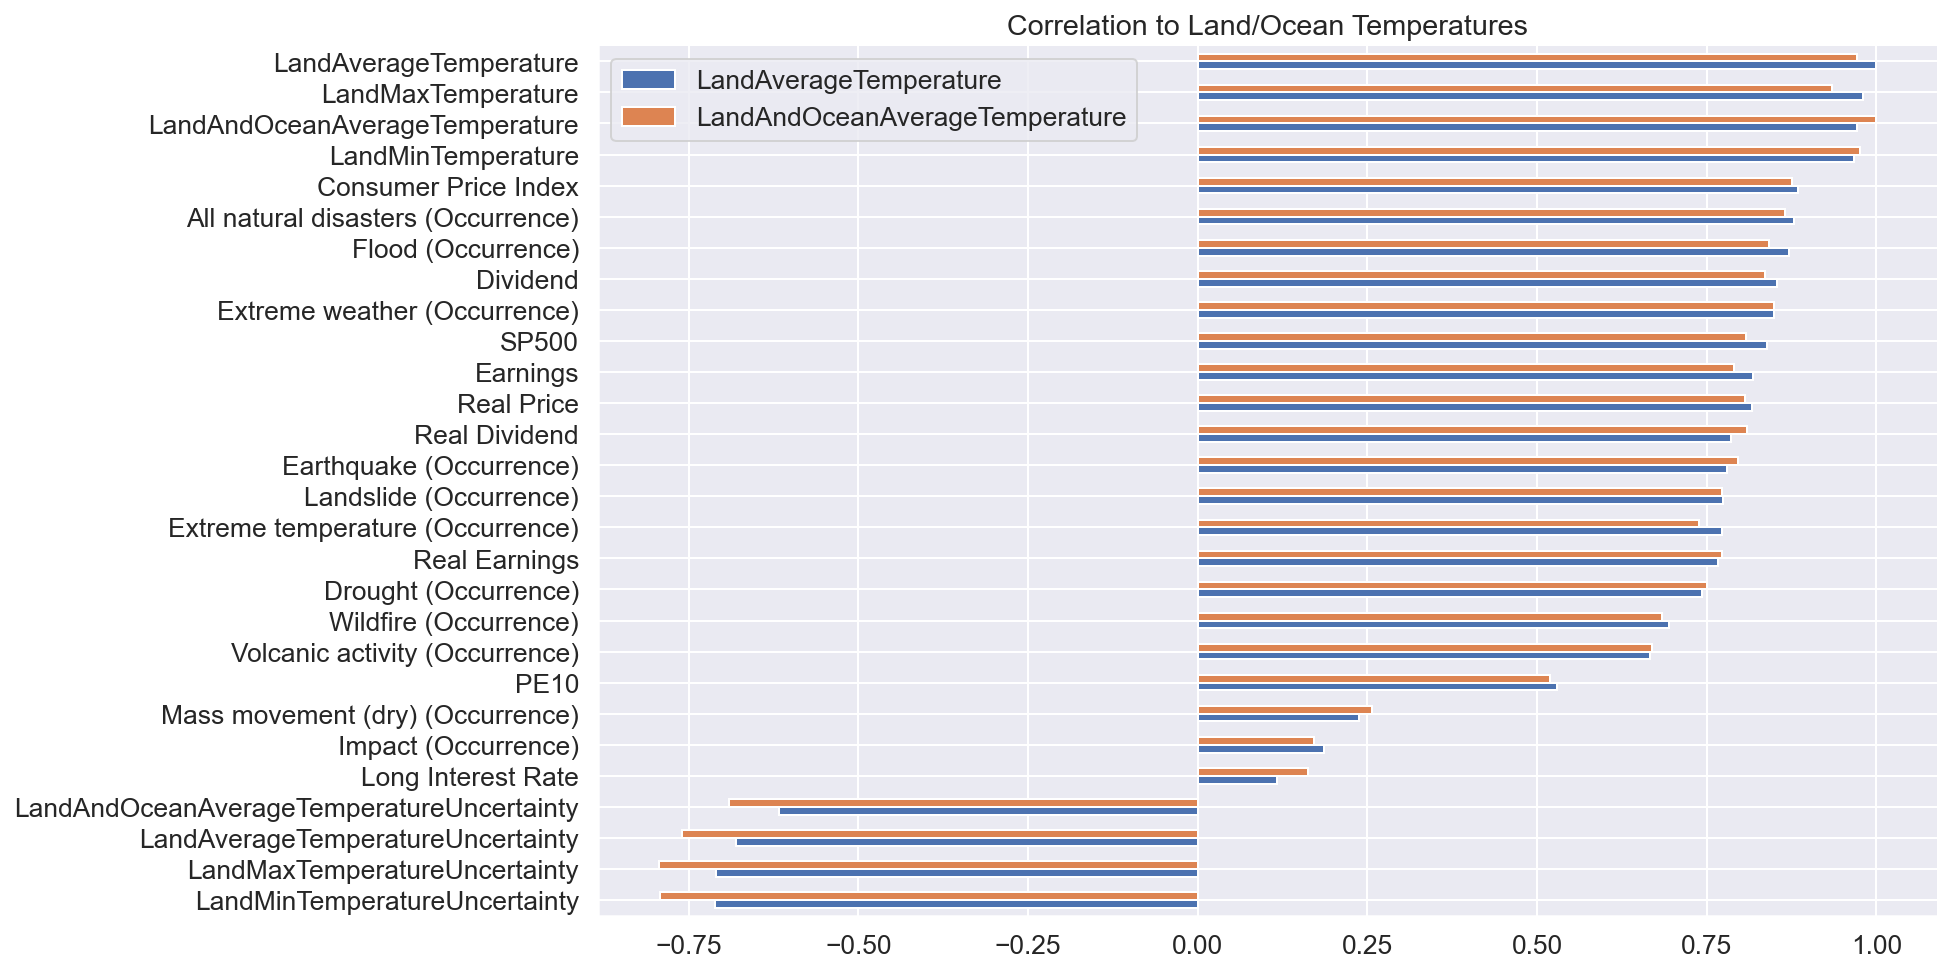

In [210]:
corrs.sort_values(by='LandAverageTemperature',ascending=True).plot.barh()
plt.title('Correlation to Land/Ocean Temperatures');

In [141]:
merged.columns

Index(['All natural disasters (Occurrence)', 'Drought (Occurrence)',
       'Earthquake (Occurrence)', 'Extreme temperature (Occurrence)',
       'Extreme weather (Occurrence)', 'Flood (Occurrence)',
       'Impact (Occurrence)', 'Landslide (Occurrence)',
       'Mass movement (dry) (Occurrence)', 'Volcanic activity (Occurrence)',
       'Wildfire (Occurrence)', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'SP500', 'Dividend',
       'Earnings', 'Consumer Price Index', 'Long Interest Rate', 'Real Price',
       'Real Dividend', 'Real Earnings', 'PE10'],
      dtype='object')

In [176]:
y= merged["LandAndOceanAverageTemperature"]

In [183]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq',period=12)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    return decomposition

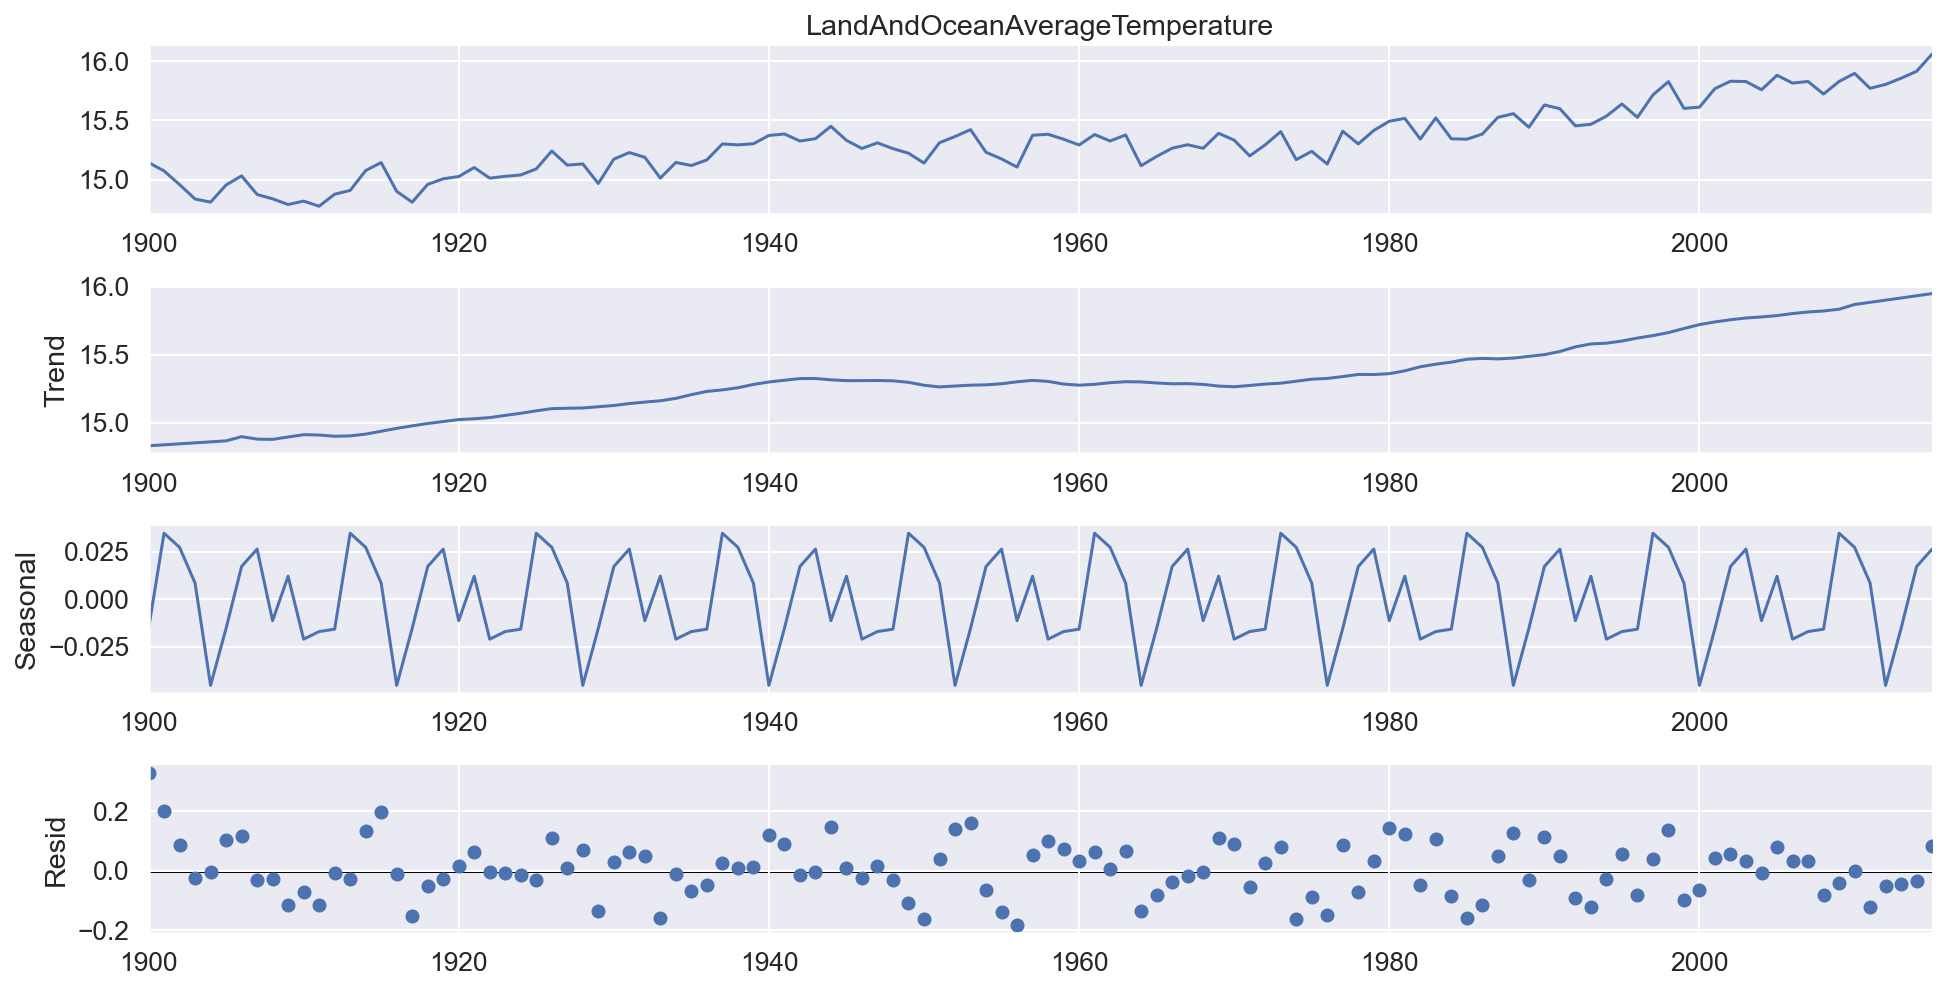

In [184]:
decomp = seasonal_decompose(y)

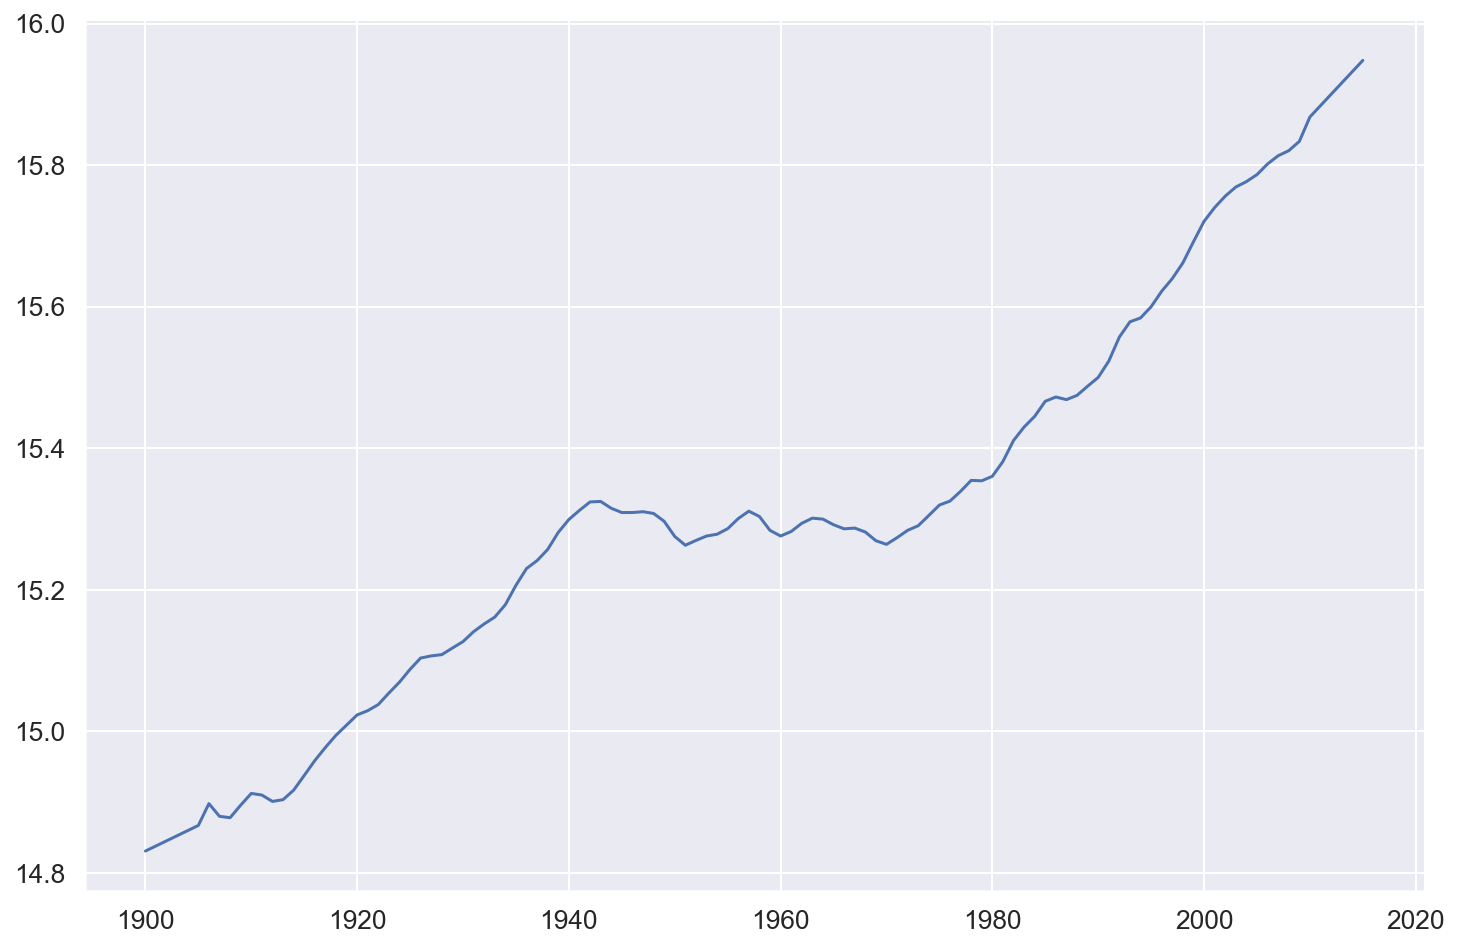

In [186]:
merged['temp_trend'] = decomp.trend.plot()

<AxesSubplot:>

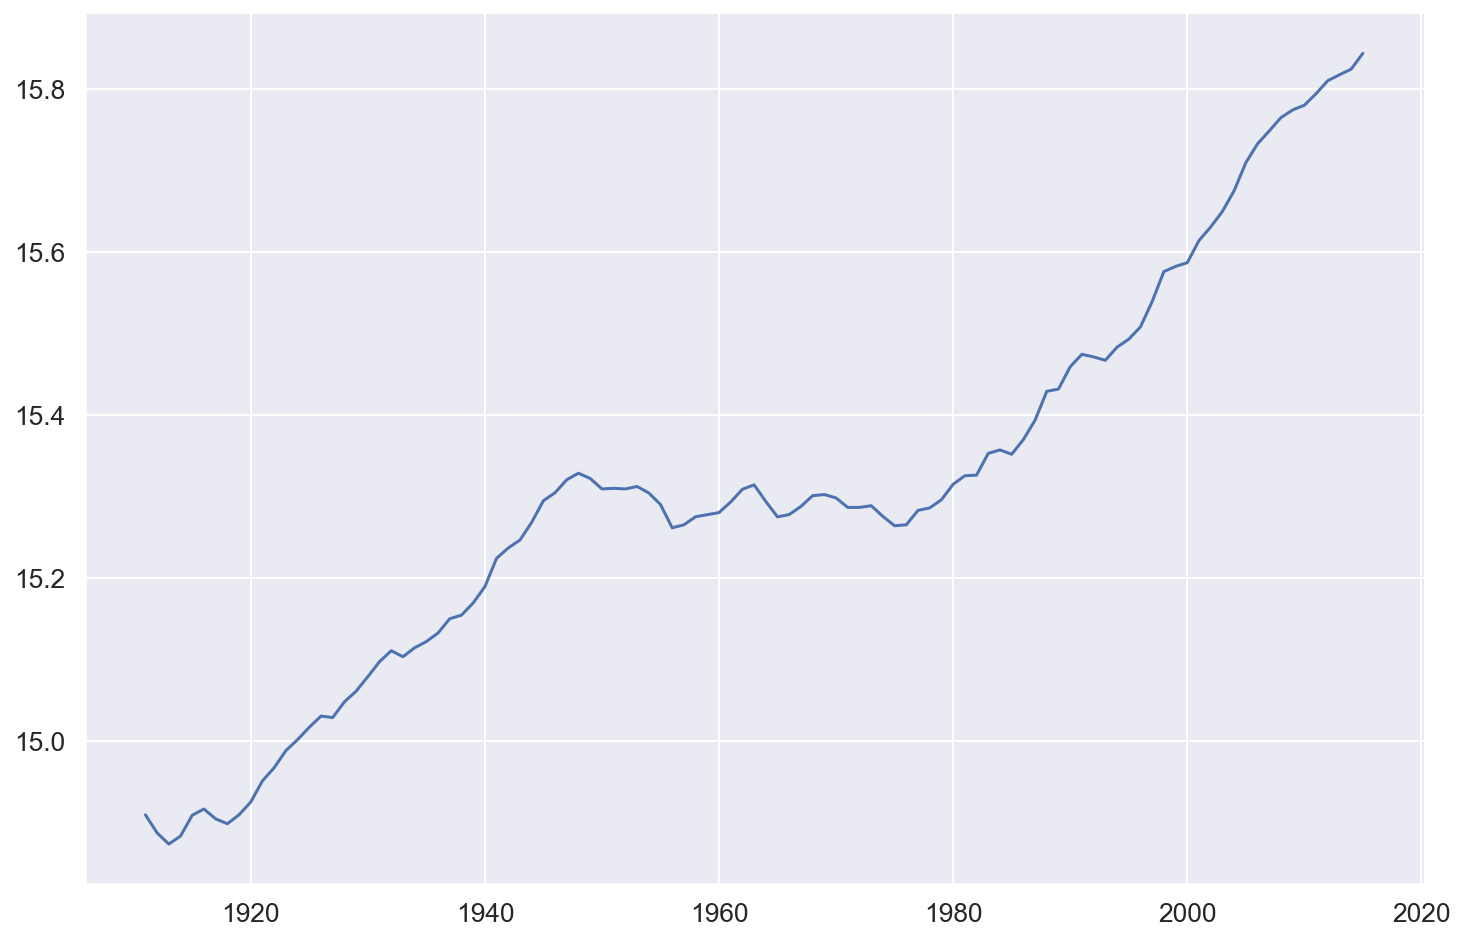

In [195]:
y.rolling(window=12).mean().plot()

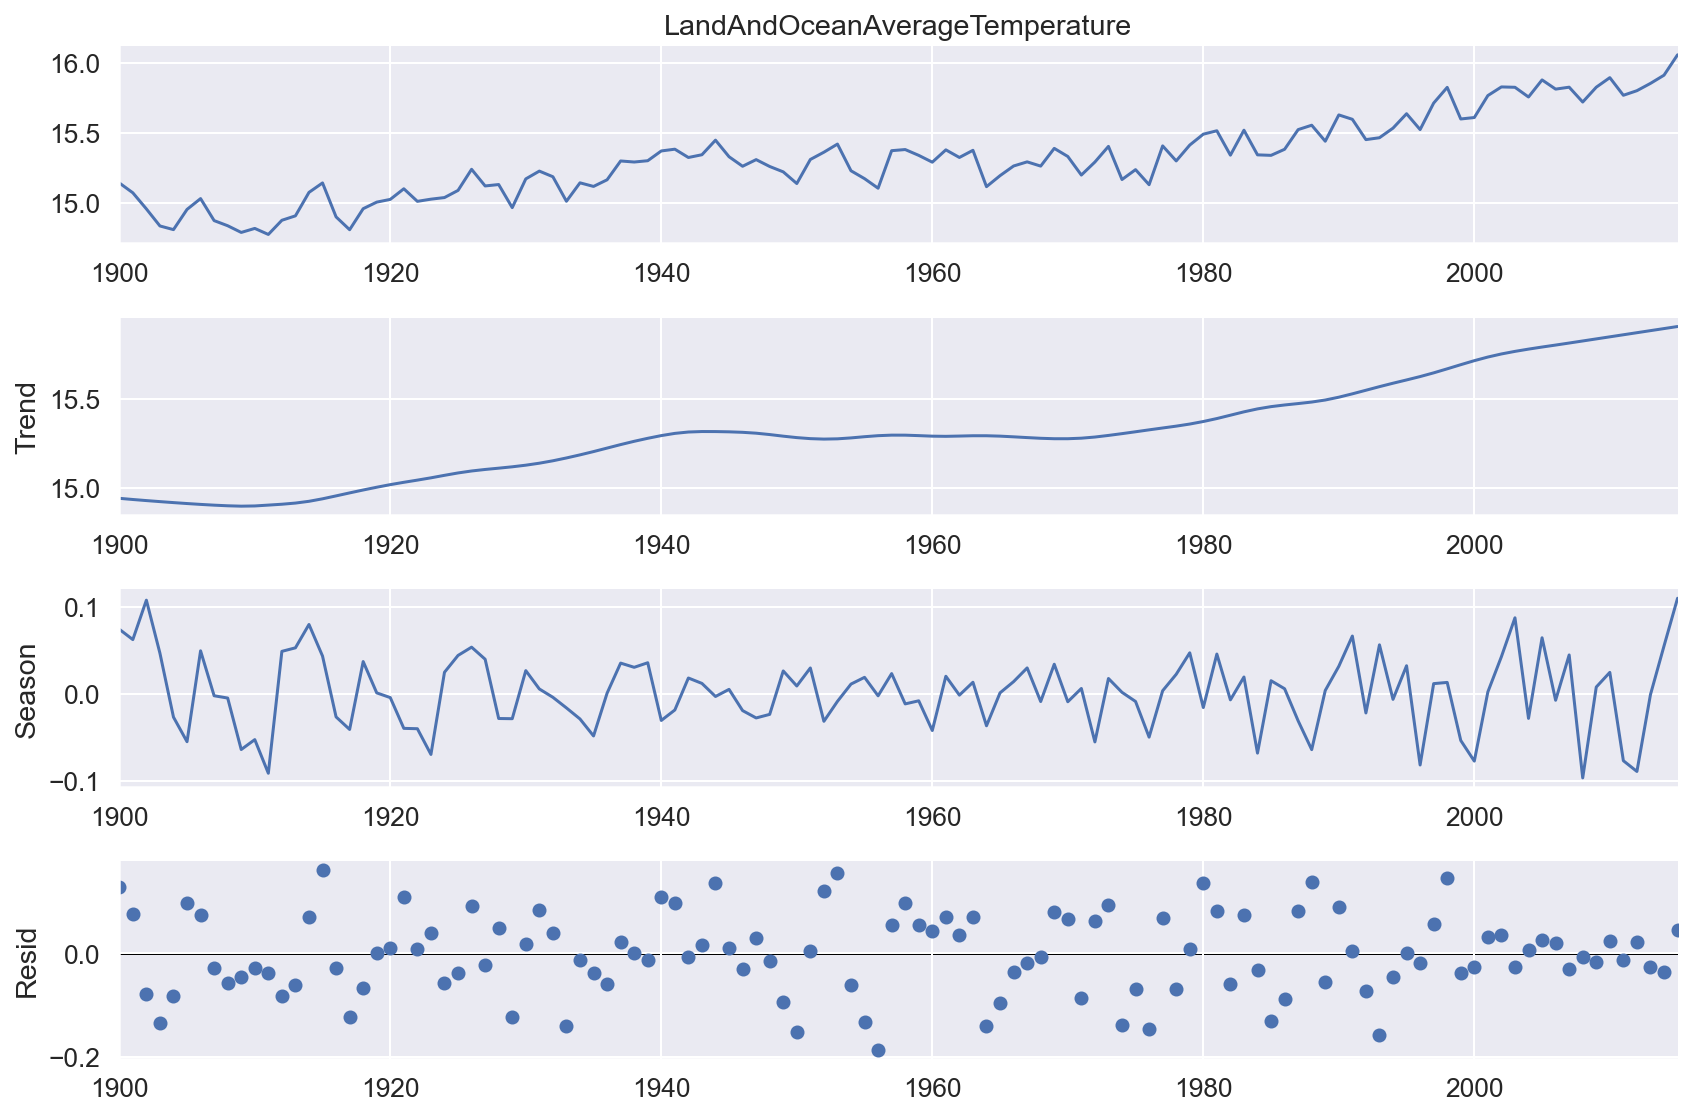

In [198]:
from statsmodels.tsa.seasonal import STL

stl = STL(y, period=12,seasonal=13)
res = stl.fit()
fig = res.plot()

In [200]:
merged['temp_trend'] = res.trend

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LandAndOceanAverageTemperature', ylabel='All natural disasters (Occurrence)'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LandAndOceanAverageTemperature', ylabel='Consumer Price Index'>

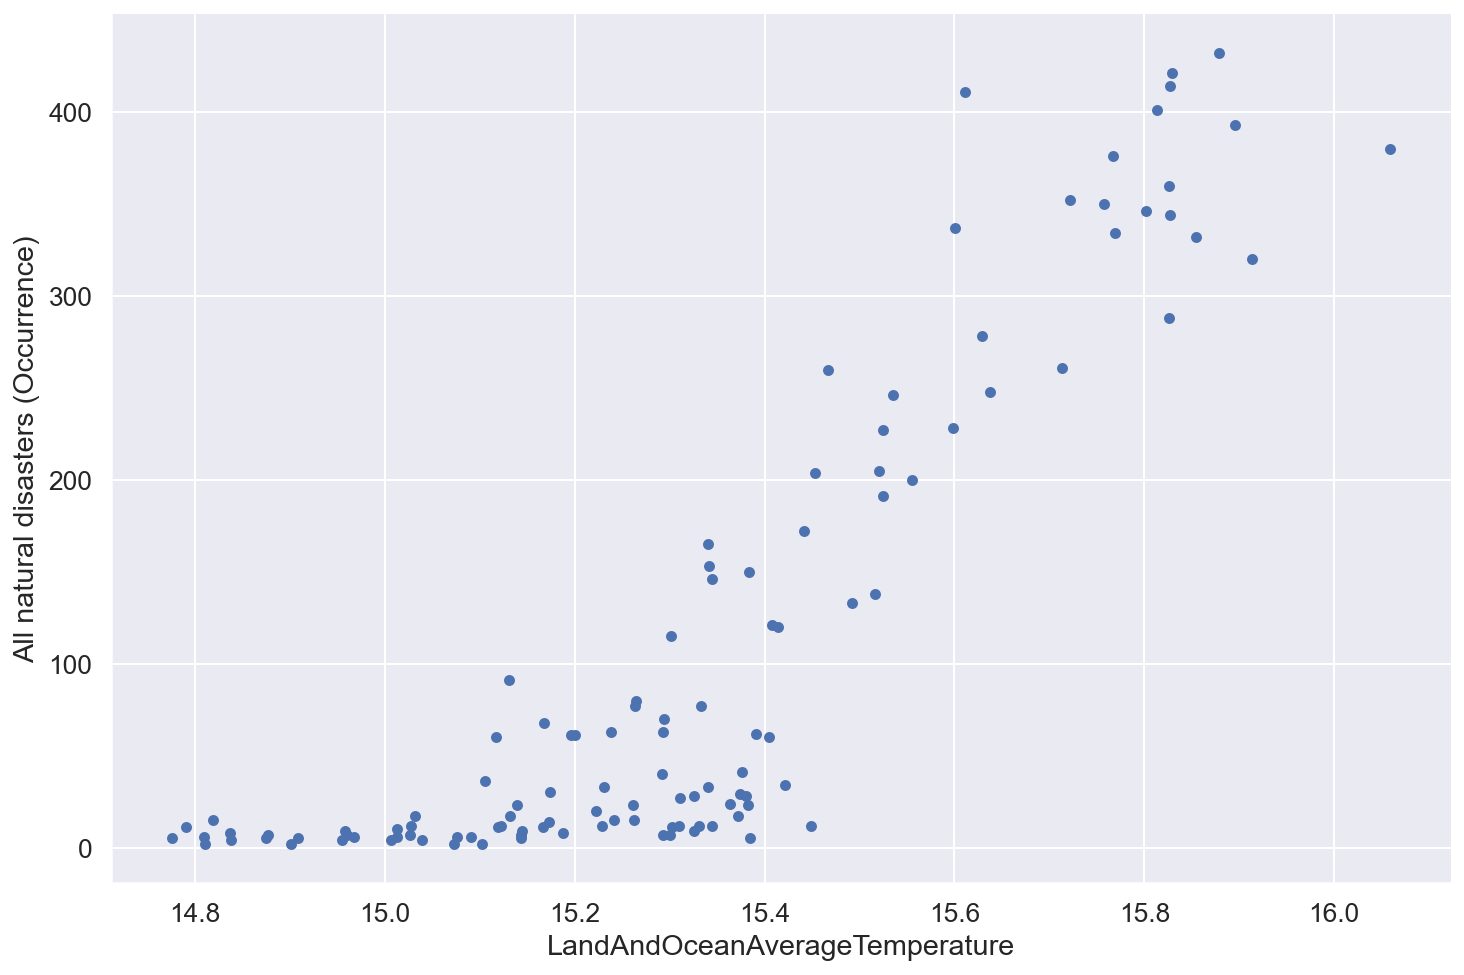

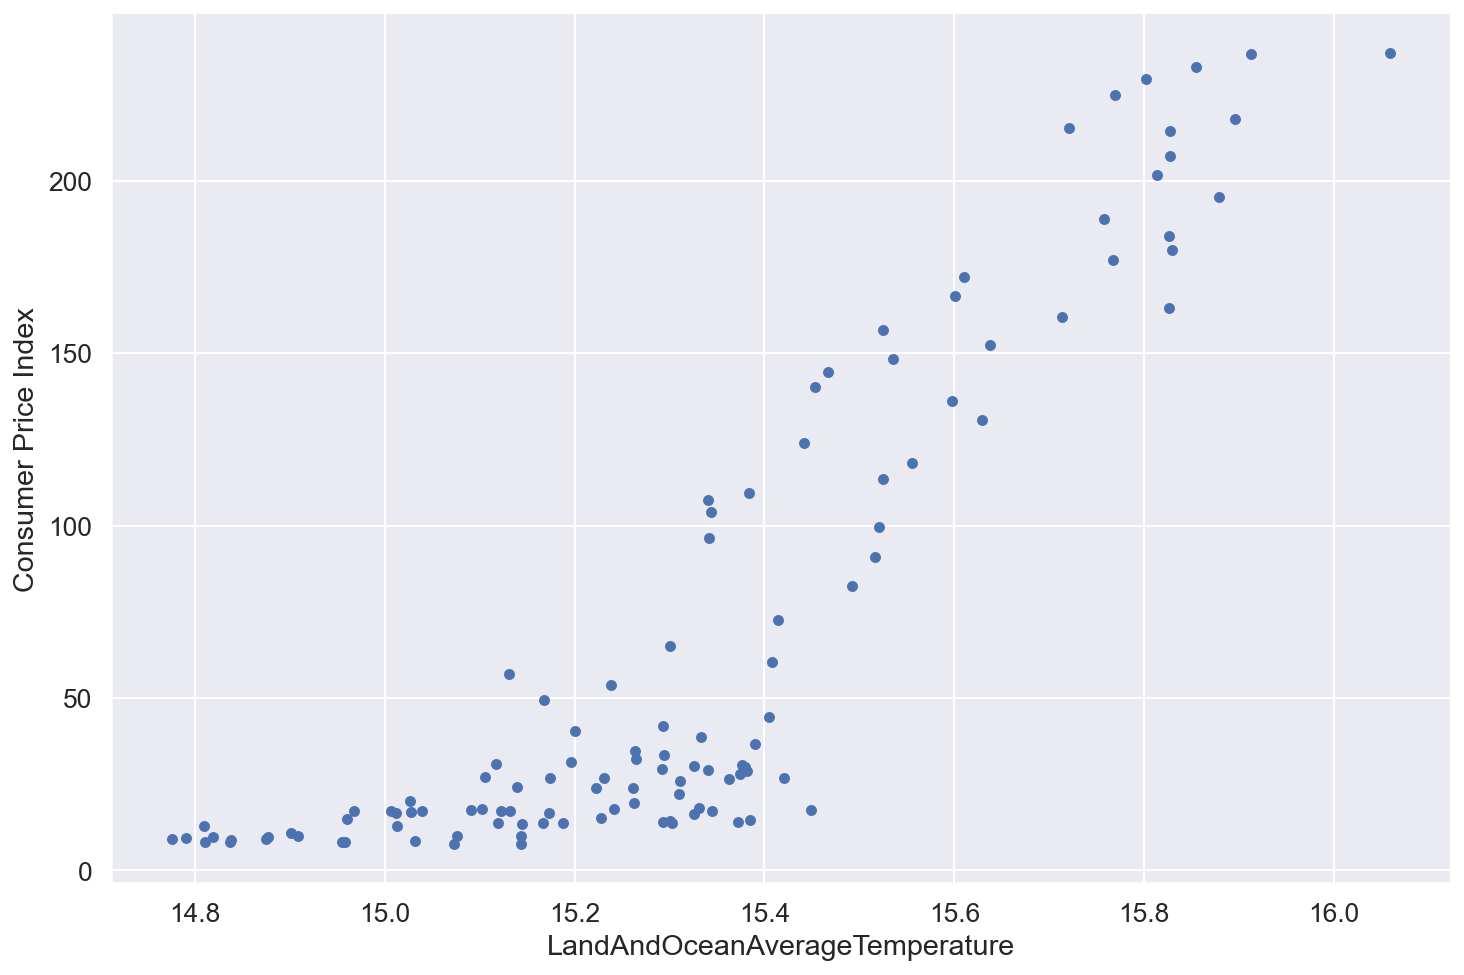

In [154]:
merged.plot.scatter(x="LandAndOceanAverageTemperature",y='All natural disasters (Occurrence)')
merged.plot.scatter(x="LandAndOceanAverageTemperature",y="Consumer Price Index")

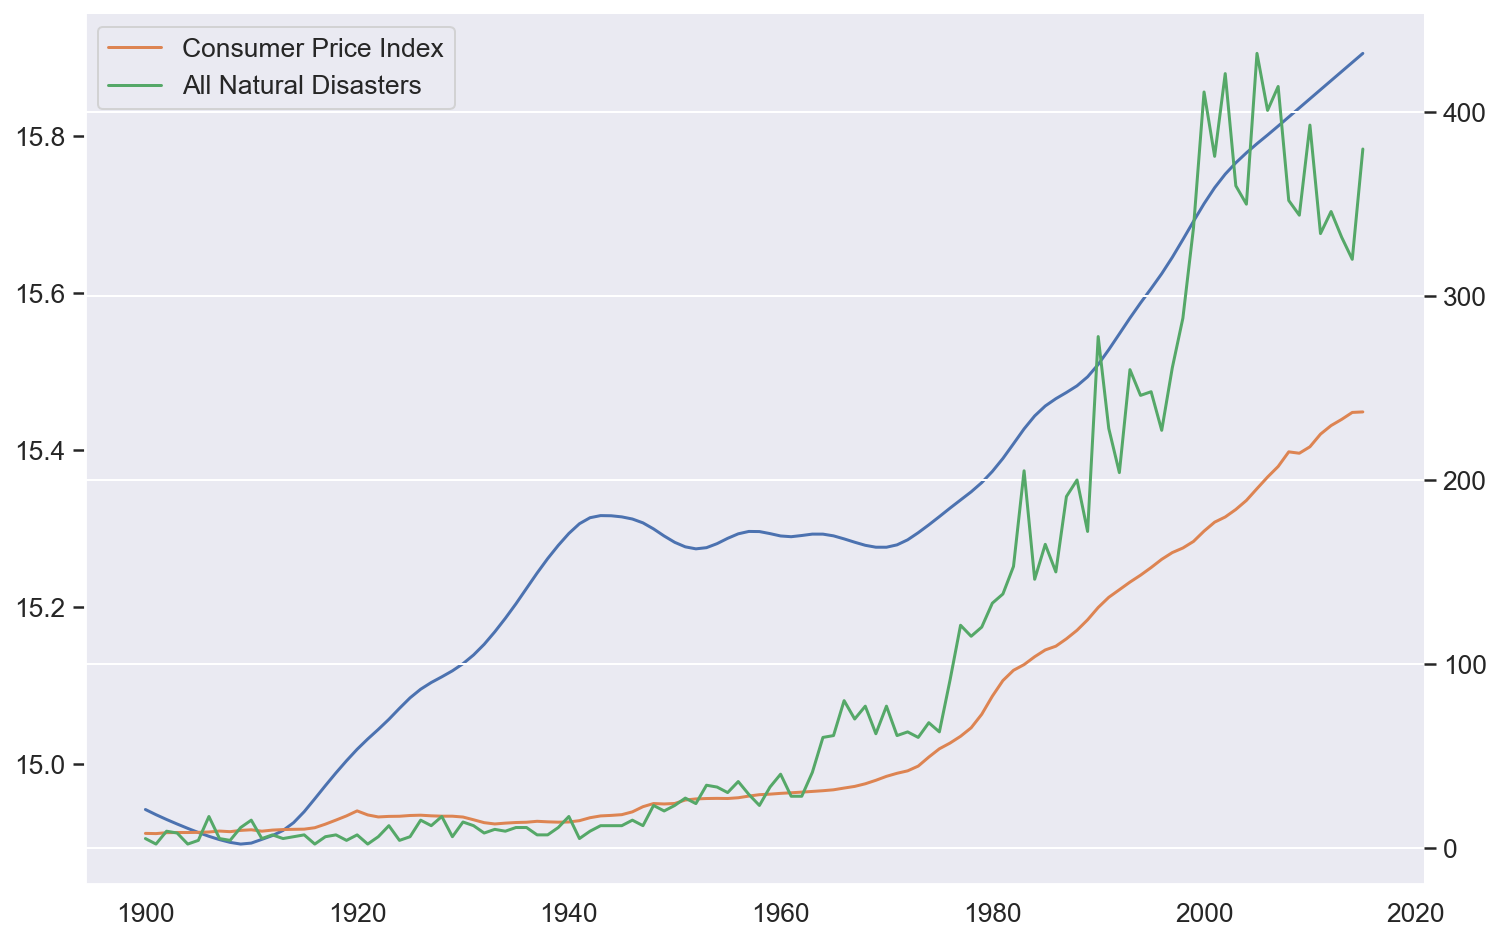

In [208]:
merged['temp_trend'].plot(label='Temperature Trend')
merged['Consumer Price Index'].plot(secondary_y=True,label='Consumer Price Index')
merged['All natural disasters (Occurrence)'].plot(secondary_y=True,label='All Natural Disasters')
plt.legend();

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend=“t”))
stlf_res = stlf.fit()
forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.show()